In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def ff(cue,kratio):
    res = np.exp(1j*cue) + kratio
    return np.angle(res)
def circR(samples,axis=None):
    res = np.mean(np.exp(1j * samples), axis=axis)
    return res
def wrap(ang):
    return np.mod(ang+np.pi,2*np.pi) - np.pi

In [55]:
import pickle
with open('firing_1230.data','rb') as f:
    solutions=pickle.load(f)
memorys = np.load('xMemoryList_1230.npy')
memorys = np.mod(memorys,np.pi*2)
synapses = np.load('WList_1230.npy')
cues = np.load('xCueList_1230.npy')
results = np.load('xFinalList_1230.npy')
results = np.mod(results,np.pi*2)

In [57]:
# del memorys
# del cues
# del synapses
# del results
# #%%
# del solutions

In [58]:
nIter = 3
M = 15
N= 200
modes = ['Full','Feedforward','None']

In [59]:
# len(solutions)
# #%%
# results = np.empty((nIter,N,M))
# for ii in range(nIter):
#     for k in range(M):
#         results[ii][:,k] = solutions[M*ii+k]['final']

In [60]:
# from matplotlib import cm
# ii = np.random.randint(0,nIter)
# k = np.random.randint(0,M)
# ind = M*ii+k
# x_target = memorys[ii][:,k]
# x_t = solutions[ind]['y']
# t = solutions[ind]['t']
# for i in np.random.randint(0,N,20):
#     p = np.mod(x_target[i],2*np.pi)
#     plt.plot(t,x_t[i,:],c=cm.hsv(p/(2*np.pi)))
# # plt.colorbar()

In [61]:
x = {}
x[modes[0]] = results
k_prior = 0.5	# von Mises concentration parameter
                # for prior distribution
k_noise = 10	# for cue distribution
x[modes[1]] = ff(cues,k_prior/k_noise)
x[modes[2]] = np.zeros_like(results)

In [62]:
dx = {}
for mode in modes:
    dx[mode] = x[mode]-memorys
    dx[mode] = dx[mode].flatten()
    dx[mode] = wrap(dx[mode])

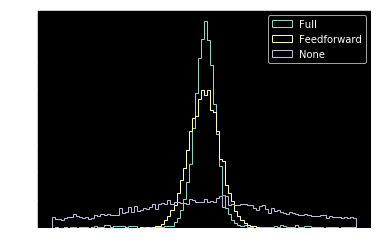

In [63]:
h = {}
for mode in modes:
    h[mode] = plt.hist(dx[mode],100,(-np.pi,np.pi),density=True,histtype='step',label=mode)
    plt.legend()
        

In [64]:
R = {}
bias= {}
var = {}
lsd = {}
error = {}
# S = {}
for mode in modes:
    lsd[mode] = np.std(dx[mode])
    R[mode] = circR(dx[mode])
    bias[mode] = np.angle(R[mode])
    var[mode] = 1 - abs(R[mode])
    error[mode] = var[mode] + 2*abs(R[mode])*(np.sin(bias[mode]/2)**2)
    # h[mode] = h[mode]/np.sum(h[mode])
    # S[mode] = -np.sum(h[mode]*np.log(h[mode]))
print('mean bias: \n',bias)
print('linear root mean squared error: \n',lsd)
print('circular variance: \n',var)
print('circular dispersion: \n',error)
# print('Entropy: ',S)

mean bias: 
 {'Full': 0.018449330334730278, 'Feedforward': 0.0035890553447162216, 'None': -0.00044659168249207575}
linear root mean squared error: 
 {'Full': 0.4384463592991398, 'Feedforward': 0.32526109641683176, 'None': 1.5303924093805708}
circular variance: 
 {'Full': 0.0713861620701356, 'Feedforward': 0.05148720715510069, 'None': 0.7557437280595485}
circular dispersion: 
 {'Full': 0.07154419735028382, 'Feedforward': 0.05149331619612566, 'None': 0.755743752417288}


In [65]:
# from scipy.special import iv
# print('var_none_theoretical:',1-iv(1,k_prior)/iv(0,k_prior))

